## ROC  / Precision-Recall Curves

There is another curve used to evaluate classifiers: the precision recall curve.

Unlike the ROC, the PR curve is affected by the underlying baseling accuracy.

It might be more informative for data with rare occurrences, or if you care a lot more about the 'positive' class.

We're going to use the titanic dataset to demonstrate the two curves, and develop a better intuition for what the decision threshold means.

In [1]:
from __future__ import division
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, precision_recall_curve, auc, accuracy_score, precision_score, recall_score


In [2]:
df = pd.read_csv('./datasets/titanic.csv')

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
y = df['Survived']
X = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
X['Sex']  = X['Sex'].map(lambda x: 1 if x=='Male' else 0)
logreg = LogisticRegression()
logreg.fit(X,y)

print 'base line is', max(y.mean(), 1-y.mean())
print 'mean cross val:', cross_val_score(logreg, X, y).mean()



base line is 0.616161616162
mean cross val: 0.683501683502


/Users/phillippa/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
def getcurves(thresh, y, X, model):
    
    y_pred = [1 if x > thresh else 0 for x in logreg.predict_proba(X)[:,1]]
    prc = precision_recall_curve(y, model.predict_proba(X).T[1])
    roc = roc_curve(y, model.predict_proba(X).T[1])
    
    acc = accuracy_score(y,y_pred)
    precision = precision_score(y,y_pred)
    rec = recall_score(y,y_pred)
    
    temp=pd.DataFrame(zip(y, y_pred), columns=['true', 'pred'])
    tp = len(temp[(temp['true']==1)&(temp['pred']==1)])
    tn = len(temp[(temp['true']==0)&(temp['pred']==0)])
    fp = len(temp[(temp['true']==0)&(temp['pred']==1)])
    fn = len(temp[(temp['true']==1)&(temp['pred']==0)])
    
    false_pos = fp / (tn + fp)

    fig, ax = plt.subplots(1,2, figsize=(12,5))
    
    fpr, tpr, thresholds = roc
    ax[0].plot(fpr, tpr, label='ROC Curve', c="red")
    ax[0].scatter(false_pos, rec, s=150, c="green", marker="s", label="current model")
    ax[0].set_xlabel("% of died who are predicted as survived")
    ax[0].set_ylabel("% of survived who are predicted as survived")
    ax[0].set_title("Predicting Survival - ROC Curve")
    ax[0].set_xlim([0,1])
    ax[0].set_ylim([0,1])
    ax[0].legend(loc='best')
    
    prec, recall, thresholds = prc
    ax[1].plot(recall, prec, label='Prec-Recall Curve', c="blue")
    ax[1].scatter(rec, precision, s=150, c="green", marker="s", label="current model")
    ax[1].set_xlabel("% of survived who are predicted as survived")
    ax[1].set_ylabel("% of predicted as survived who survived'")
    ax[1].set_title("Predicting Survival - Precision/Recall Curve")
    ax[1].set_xlim([0,1])
    ax[1].set_ylim([0,1])
    ax[1].legend(loc='best')

We can vary the decision threshold, and plot the position of that 'model' on the curve

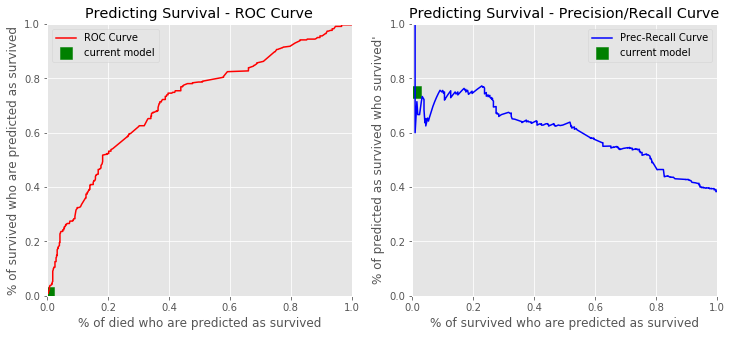

In [9]:
getcurves(0.9, y, X, logreg)